In [26]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [27]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [28]:
df_germancredit=pd.read_csv('german_credit.csv')
df_germancredit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [29]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [30]:
# Print Shape of model data
df_germancredit.shape

(1000, 21)

In [31]:
df_germancredit_d=pd.get_dummies(df_germancredit)
df_germancredit_d.head(10)

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,6,1169,4,4,67,2,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,1,48,5951,2,2,22,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,1,0,0,0,0,1,1,0,0,1
3,0,42,7882,2,4,45,1,2,0,1,...,0,0,0,1,0,0,1,0,0,1
4,1,24,4870,3,4,53,2,2,0,1,...,0,0,0,1,0,0,1,0,0,1
5,0,36,9055,2,4,35,1,2,0,0,...,0,0,0,0,0,1,0,1,0,1
6,0,24,2835,3,4,53,1,1,0,0,...,1,0,0,1,0,0,1,0,0,1
7,0,36,6948,2,2,35,1,1,1,0,...,0,1,1,0,0,0,0,1,0,1
8,0,12,3059,2,4,61,1,1,0,0,...,1,0,0,0,0,1,1,0,0,1
9,1,30,5234,4,2,28,2,1,1,0,...,1,0,1,0,0,0,1,0,0,1


In [32]:
df_germancredit_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
default                                                                       1000 non-null int64
duration_in_month                                                             1000 non-null int64
credit_amount                                                                 1000 non-null int64
installment_as_income_perc                                                    1000 non-null int64
present_res_since                                                             1000 non-null int64
age                                                                           1000 non-null int64
credits_this_bank                                                             1000 non-null int64
people_under_maintenance                                                      1000 non-null int64
account_check_status_0 <= ... < 200 DM                                        1000 non-null uint8
account_chec

### Check for highly correlated variables but don't required any treatment for this use case

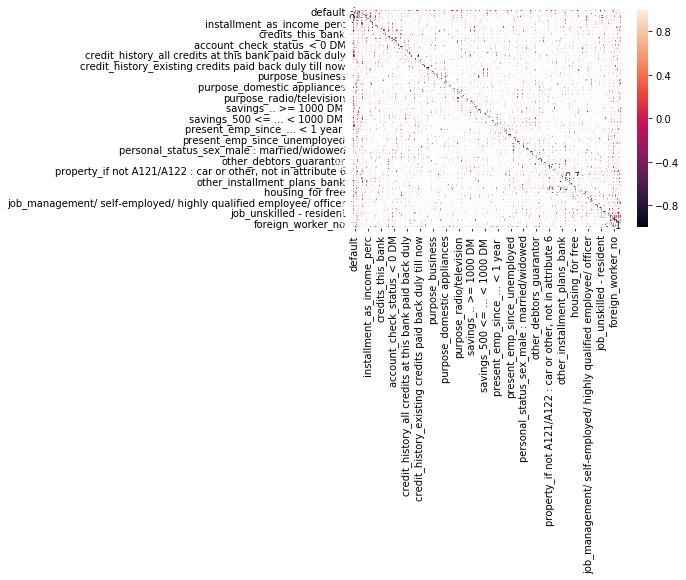

In [33]:
sns.heatmap(df_germancredit_d.corr(),annot=True)

In [34]:
df_germancredit_d.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,0.119581,0.258333,...,-0.134589,0.092785,0.040559,-0.013559,0.005951,-2.182179e-02,0.036466,-0.036466,-0.082079,0.082079
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.089452,0.022244,...,-0.075169,-0.064417,0.147515,0.055010,-0.044043,-1.812030e-01,-0.164718,0.164718,-0.138196,0.138196
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.119612,-0.020912,...,-0.117497,-0.024611,0.319715,-0.092636,-0.027969,-1.617570e-01,-0.276995,0.276995,-0.050050,0.050050
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.051906,0.046917,...,0.049922,-0.091373,0.042805,0.042623,-0.087834,-5.723714e-02,-0.014413,0.014413,-0.090024,0.090024
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.055817,0.088350,...,-0.297547,0.167285,0.004952,-0.000657,-0.034545,9.064820e-03,-0.095359,0.095359,-0.054097,0.054097
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.078121,-0.011162,...,0.006553,-0.212620,0.127605,-0.148283,0.059954,4.371237e-02,-0.145259,0.145259,-0.006151,0.006151
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.052662,-0.029195,...,0.041386,-0.058070,-0.010906,-0.001471,0.059582,-1.039203e-02,-0.065553,0.065553,-0.009717,0.009717
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.066643,0.059041,...,-0.027579,-0.063033,-0.015096,-0.106737,-0.007723,1.450658e-01,0.014753,-0.014753,0.077071,-0.077071
account_check_status_0 <= ... < 200 DM,0.119581,0.089452,0.119612,-0.051906,-0.055817,-0.078121,-0.052662,-0.066643,1.000000,-0.372670,...,0.001012,-0.000888,0.051999,-0.067587,0.047382,1.804077e-02,-0.015276,0.015276,-0.059172,0.059172
account_check_status_< 0 DM,0.258333,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,-0.372670,1.000000,...,-0.125705,0.093310,-0.022427,-0.002879,-0.000428,2.354213e-02,0.067149,-0.067149,0.057751,-0.057751


### Drop the original variables which are converted to dummy

When we use get dummies then original column is automatically dropped

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [35]:
X = df_germancredit_d.drop('default', axis = 1)
y = df_germancredit_d['default']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=2)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
rfcl = rfcl.fit(X_train, y_train)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [38]:
from sklearn import metrics
y_pred_class = rfcl.predict(X_test)
print("Test accuracy is : ",rfcl.score(X_test , y_test))
print("Train accuracy is : ",rfcl.score(X_train , y_train))
cm = metrics.confusion_matrix(y_test, y_pred_class)
cm

Test accuracy is :  0.74
Train accuracy is :  1.0


array([[189,  12],
       [ 66,  33]], dtype=int64)

### Q6 Show the list of the features importance( 1 Marks)

In [61]:
print(rfcl.feature_importances_)

[0.07211192 0.0983573  0.03584705 0.0338774  0.07991877 0.01846382
 0.01282569 0.01748106 0.03151415 0.00892639 0.04357778 0.00734608
 0.0202044  0.01059535 0.01382204 0.00841517 0.0089194  0.0095497
 0.0170838  0.01084006 0.01572393 0.00511415 0.00207377 0.0137064
 0.0027338  0.00090714 0.00549058 0.02030065 0.00850668 0.00634469
 0.0159562  0.01411385 0.01319061 0.01632538 0.01398153 0.00826247
 0.01583793 0.0061161  0.00778811 0.01643098 0.00565038 0.00688355
 0.00877433 0.01399628 0.01435674 0.01958459 0.01423681 0.01572651
 0.01543809 0.0053987  0.00693771 0.01552723 0.01133406 0.01190655
 0.01678208 0.00234004 0.01228113 0.01401927 0.01416152 0.00296648
 0.00311568]


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [39]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [49]:
# Use below values
num_folds = 10
seed = 77

In [50]:
#Validate the Random Forest model build above using k fold

In [51]:
rfcl = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=seed)
rfcl = rfcl.fit(X_train, y_train)
scores = cross_val_score(rfcl, X_train, y_train, cv=num_folds, scoring='accuracy')
print (scores)

[0.74647887 0.75714286 0.75714286 0.8        0.77142857 0.75714286
 0.71428571 0.8        0.82857143 0.75362319]


In [52]:
#Calculate Mean score
print (scores.mean())

0.7685816347359519


In [53]:
# Calculate score standard deviation using std()
print (scores.std())

0.031038651425408983


In [ ]:
# Q8 Print the confusion matrix( 1 Marks)

In [54]:
y_pred_class = rfcl.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred_class)
cm

array([[191,  10],
       [ 66,  33]], dtype=int64)

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [55]:
print(metrics.accuracy_score(y_test, y_pred_class))

0.7466666666666667


Classification accuracy is 74%

In [56]:
print(metrics.recall_score(y_test, y_pred_class))

0.3333333333333333


Recall is 33%

In [57]:
print(metrics.precision_score(y_test, y_pred_class))

0.7674418604651163


Precision is 76%

# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [0]:
#Hint: Use roc_curve

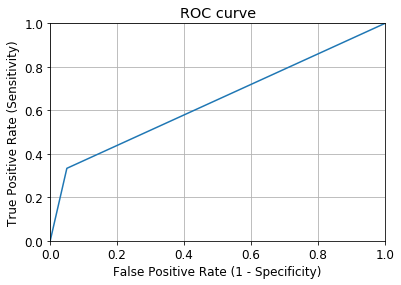

In [62]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_class)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [60]:
print(metrics.roc_auc_score(y_test, y_pred_class))

0.6417910447761194


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
